# Developing a Win Prediction Model Using the Moneyball Method

https://www.samford.edu/sports-analytics/fans/2019/The-Moneyball-Science

#Modeling Wins Using Run Differential

##Data Collection

https://www.baseball-reference.com/leagues/majors/2023-standard-batting.shtml

https://www.baseball-reference.com/leagues/majors/2023-standard-batting.shtml

Import Necessary Libraries

In [ ]:
import pandas as pd

Read Data into Dataframes

In [ ]:
batting_stats_2023 = pd.read_csv('mlb_team_batting_2023.csv', usecols=['Tm', 'R'])
pitching_stats_2023 = pd.read_csv('mlb_team_pitching_2023.csv', usecols=['Tm', 'W', 'R'])

Merge 2023 Team Stats into a Single Dataframe

In [ ]:
batting_stats_2023.head()

,Tm,R
0,Arizona Diamondbacks,746
1,Atlanta Braves,947
2,Baltimore Orioles,807
3,Boston Red Sox,772
4,Chicago Cubs,819


In [ ]:
pitching_stats_2023.head()

,Tm,W,R
0,Arizona Diamondbacks,84,761
1,Atlanta Braves,104,716
2,Baltimore Orioles,101,678
3,Boston Red Sox,78,776
4,Chicago Cubs,83,723


In [ ]:
team_stats_2023 = pitching_stats_2023.merge(batting_stats_2023, on='Tm', suffixes=['A', 'S'])

##Exploratory Data Analysis/Data Cleaning

View the First 5 Rows

In [ ]:
team_stats_2023.head()

,Tm,W,RA,RS
0,Arizona Diamondbacks,84,761,746
1,Atlanta Braves,104,716,947
2,Baltimore Orioles,101,678,807
3,Boston Red Sox,78,776,772
4,Chicago Cubs,83,723,819


Identify Outliers With Boxplots

<Axes: >

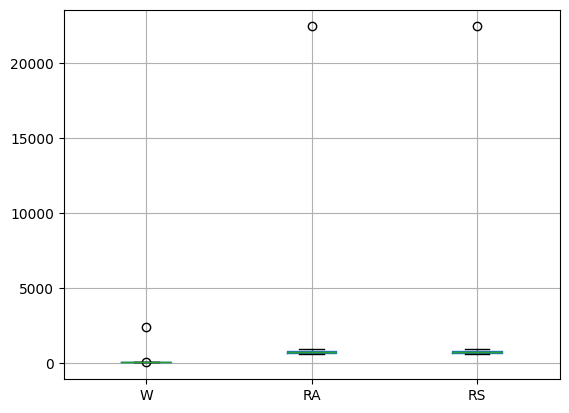

In [ ]:
team_stats_2023.boxplot()

Identify the Number of Null Rows

In [ ]:
team_stats_2023.isnull().sum()

,0
Tm,1
W,0
RA,0
RS,0


Remove Null Rows

In [ ]:
team_stats_2023.dropna(inplace=True)

<Axes: >

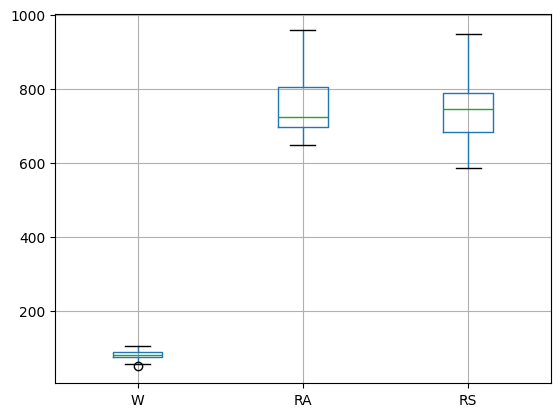

In [ ]:
team_stats_2023.boxplot()

In [ ]:
team_stats_2023.isnull().sum()

,0
Tm,0
W,0
RA,0
RS,0


Plot Relationship Between Runs Scored/Allowed and Wins

<Axes: xlabel='RS', ylabel='W'>

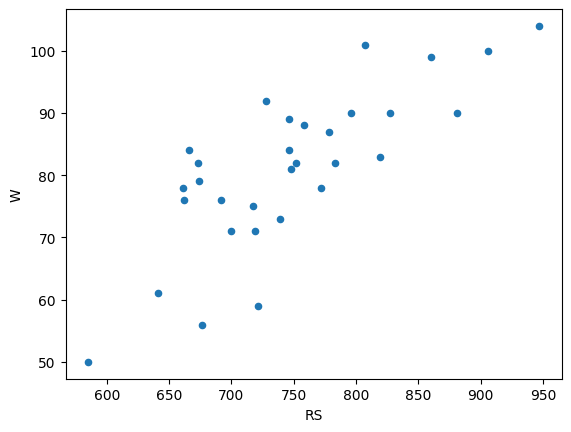

In [ ]:
team_stats_2023.plot.scatter('RS', 'W')

<Axes: xlabel='RA', ylabel='W'>

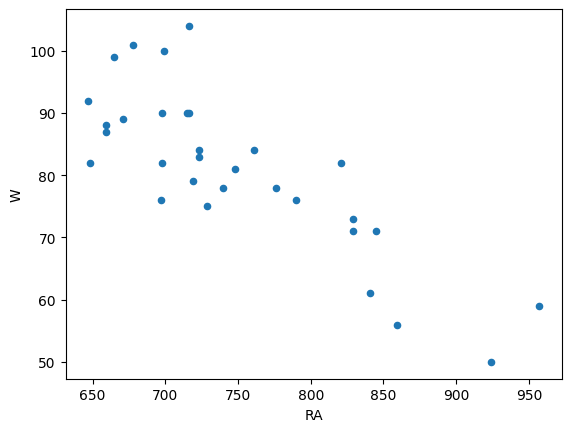

In [ ]:
team_stats_2023.plot.scatter('RA', 'W')

##Feature Engineering

Creating Run Differential Variable

In [ ]:
team_stats_2023['Run Diff'] = team_stats_2023['RS'] - team_stats_2023['RA']

In [ ]:
team_stats_2023.head()

,Tm,W,RA,RS,Run Diff
0,Arizona Diamondbacks,84,761,746,-15
1,Atlanta Braves,104,716,947,231
2,Baltimore Orioles,101,678,807,129
3,Boston Red Sox,78,776,772,-4
4,Chicago Cubs,83,723,819,96


Plot Relationship Between Runs Differential and Wins

<Axes: xlabel='Run Diff', ylabel='W'>

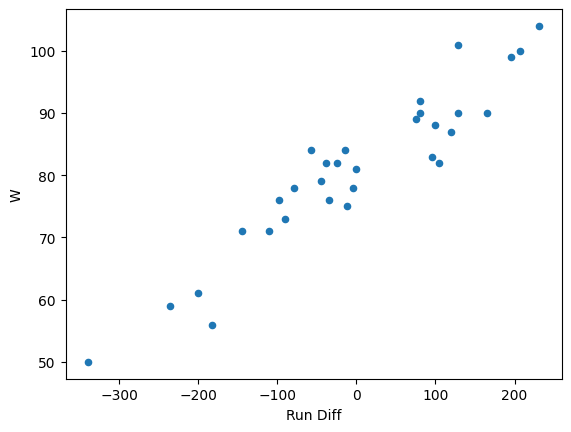

In [ ]:
team_stats_2023.plot.scatter('Run Diff', 'W')

##Modeling

Import Necessary Libraries

In [ ]:
from sklearn.linear_model import LinearRegression

Define X and y variables

In [ ]:
X = team_stats_2023[['Run Diff']]
y = team_stats_2023[['W']]

Create the Linear Regression Model

In [ ]:
model = LinearRegression()

Fit the Model to the Data

In [ ]:
model.fit(X, y)

LinearRegression()

Get the $R^2$ of the Model

In [ ]:
model.score(X, y)

0.8907123098079562

Get the Coefficient and Intercept of the Model

In [ ]:
model.coef_[0][0]

0.08852526021296242

In [ ]:
model.intercept_[0]

81.0

$Wins = 81 + .08853 * Run Diff$

#Modeling Run Differential Using Player Stats

##Data Collection

https://www.baseball-reference.com/leagues/majors/2023-standard-batting.shtml

https://www.baseball-reference.com/leagues/majors/2023-standard-pitching.shtml

https://www.baseball-reference.com/leagues/majors/2023-advanced-pitching.shtml

Import Necessary Libraries

In [ ]:
import pandas as pd

Read Data into Dataframes

In [ ]:
player_batting_2023 = pd.read_csv('mlb_player_batting_2023.csv', usecols=['Player-additional', 'Team', 'PA', 'BA', 'OBP', 'SLG'])
player_pitching_2023 = pd.read_csv('mlb_player_pitching_2023.csv', usecols=['Player-additional', 'Team', 'BF'])
player_pitching_adv_2023 = pd.read_csv('mlb_player_pitching_adv_2023.csv', usecols=['-9999', 'Team', 'BA', 'OBP', 'SLG'])

Merge Player Pitching and Advanced Player Pitching

In [ ]:
player_pitching_adv_2023.head()

In [ ]:
player_pitching_adv_2023.rename(columns={'-9999':'Player-additional'}, inplace=True)

In [ ]:
player_pitching_2023 = player_pitching_2023.merge(player_pitching_adv_2023, on=['Player-additional', 'Team'])

##Exploratory Data Analysis

View the First 5 Rows of Each Dataframe

In [ ]:
player_batting_2023.head()

,Team,PA,BA,OBP,SLG,Player-additional
0,TEX,753,0.276,0.348,0.478,semiema01
1,ATL,735,0.337,0.416,0.596,acunaro01
2,LAD,730,0.331,0.410,0.567,freemfr01
3,HOU,724,0.262,0.363,0.441,bregmal01
4,TEX,724,0.262,0.360,0.414,lowena01


In [ ]:
player_pitching_2023.head()

,Team,BF,Player-additional,BA,OBP,SLG
0,SFG,850,webblo01,0.248,0.280,0.374
1,ARI,846,galleza01,0.238,0.284,0.382
2,NYY,821,colege01,0.206,0.259,0.322
3,STL,860,mikolmi01,0.282,0.319,0.454
4,TOR,826,bassich01,0.235,0.299,0.403


In [ ]:
set(player_batting_2023['Team'])

{'2TM',
 '3TM',
 'ARI',
 'ATL',
 'BAL',
 'BOS',
 'CHC',
 'CHW',
 'CIN',
 'CLE',
 'COL',
 'DET',
 'HOU',
 'KCR',
 'LAA',
 'LAD',
 'MIA',
 'MIL',
 'MIN',
 'NYM',
 'NYY',
 'OAK',
 'PHI',
 'PIT',
 'SDP',
 'SEA',
 'SFG',
 'STL',
 'TBR',
 'TEX',
 'TOR',
 'WSN'}

In [ ]:
set(player_pitching_2023['Team'])

{'2TM',
 '3TM',
 'ARI',
 'ATL',
 'BAL',
 'BOS',
 'CHC',
 'CHW',
 'CIN',
 'CLE',
 'COL',
 'DET',
 'HOU',
 'KCR',
 'LAA',
 'LAD',
 'MIA',
 'MIL',
 'MIN',
 'NYM',
 'NYY',
 'OAK',
 'PHI',
 'PIT',
 'SDP',
 'SEA',
 'SFG',
 'STL',
 'TBR',
 'TEX',
 'TOR',
 'WSN'}

##Data Cleaning

Remove 2TM and 3TM Rows from 2023 data

In [ ]:
player_batting_2023 = player_batting_2023[(player_batting_2023['Team'] != '2TM') & (player_batting_2023['Team'] != '3TM')]
player_pitching_2023 = player_pitching_2023[(player_pitching_2023['Team'] != '2TM') & (player_pitching_2023['Team'] != '3TM')]

In [ ]:
set(player_batting_2023['Team'])

In [ ]:
set(player_pitching_2023['Team'])

##Feature Engineering

Find the 9 Batters That Appeared Most for Each Team in 2023

In [ ]:
lineups_2023 = player_batting_2023.groupby('Team')[['Team', 'Player-additional', 'PA', 'BA', 'OBP', 'SLG']].apply(lambda x: x.nlargest(9, 'PA')).reset_index(drop=True)

In [ ]:
lineups_2023.head()

,Team,Player-additional,PA,BA,OBP,SLG
0,ARI,walkech02,661,0.258,0.333,0.497
1,ARI,marteke01,650,0.276,0.358,0.485
2,ARI,carroco02,645,0.285,0.362,0.506
3,ARI,gurrilo01,592,0.261,0.309,0.463
4,ARI,perdoge01,495,0.246,0.353,0.359


Find the 5 Pitchers That Appeared Most for Each Team in 2023

In [ ]:
rotations_2023 = player_pitching_2023.groupby('Team')[['Team', 'Player-additional', 'BF', 'BA', 'OBP', 'SLG']].apply(lambda x: x.nlargest(5, 'BF')).reset_index(drop=True)

In [ ]:
rotations_2023.head()

,Team,Player-additional,BF,BA,OBP,SLG
0,ARI,galleza01,846,0.238,0.284,0.382
1,ARI,kellyme01,722,0.222,0.300,0.371
2,ARI,nelsory01,619,0.284,0.334,0.515
3,ARI,pfaadbr01,421,0.282,0.329,0.534
4,ARI,henryto01,381,0.251,0.328,0.418


Calculate Average Stats For Each Team

In [ ]:
team_batting_2023 = lineups_2023.groupby('Team')[['BA', 'OBP', 'SLG']].mean().reset_index()

In [ ]:
team_batting_2023.head()

,Team,BA,OBP,SLG
0,ARI,0.260444,0.328778,0.419556
1,ATL,0.279778,0.350444,0.512444
2,BAL,0.262222,0.325778,0.439889
3,BOS,0.262444,0.326778,0.447667
4,CHC,0.259778,0.336333,0.448111


In [ ]:
team_pitching_2023 = rotations_2023.groupby('Team')[['BA', 'OBP', 'SLG']].mean().reset_index()

In [ ]:
team_pitching_2023.head()

,Team,BA,OBP,SLG
0,ARI,0.2554,0.3150,0.4440
1,ATL,0.2316,0.3010,0.3678
2,BAL,0.2382,0.2978,0.4028
3,BOS,0.2360,0.3016,0.4150
4,CHC,0.2520,0.3070,0.4038


Merge 2022 Stats with 2023 Runs Scored and Runs Allowed

In [ ]:
team_stats_2023.head()

,Tm,W,RA,RS,Run Diff
0,Arizona Diamondbacks,84,761,746,-15
1,Atlanta Braves,104,716,947,231
2,Baltimore Orioles,101,678,807,129
3,Boston Red Sox,78,776,772,-4
4,Chicago Cubs,83,723,819,96


In [ ]:
team_stats = team_stats_2023.merge(team_batting_2023[['BA', 'OBP', 'SLG']], left_index=True, right_index=True)
team_stats = team_stats.merge(team_pitching_2023[['BA', 'OBP', 'SLG']], left_index=True, right_index=True, suffixes=['', 'A'])

In [ ]:
team_stats.head()

,Tm,W,RA,RS,Run Diff,BA,OBP,SLG,BAA,OBPA,SLGA
0,Arizona Diamondbacks,84,761,746,-15,0.260444,0.328778,0.419556,0.2554,0.3150,0.4440
1,Atlanta Braves,104,716,947,231,0.279778,0.350444,0.512444,0.2316,0.3010,0.3678
2,Baltimore Orioles,101,678,807,129,0.262222,0.325778,0.439889,0.2382,0.2978,0.4028
3,Boston Red Sox,78,776,772,-4,0.262444,0.326778,0.447667,0.2360,0.3016,0.4150
4,Chicago Cubs,83,723,819,96,0.259778,0.336333,0.448111,0.2520,0.3070,0.4038


View the Correlations Between 2022 Stats and 2023 Runs Scored/Allowed

In [ ]:
team_stats[['RS', 'BA', 'OBP', 'SLG']].corr()

,RS,BA,OBP,SLG
RS,1.000000,0.711200,0.851797,0.890083
BA,0.711200,1.000000,0.707638,0.801703
OBP,0.851797,0.707638,1.000000,0.884944
SLG,0.890083,0.801703,0.884944,1.000000


In [ ]:
team_stats[['RA', 'BAA', 'OBPA', 'SLGA']].corr()

,RA,BAA,OBPA,SLGA
RA,1.000000,0.760346,0.793638,0.818349
BAA,0.760346,1.000000,0.889791,0.882006
OBPA,0.793638,0.889791,1.000000,0.793119
SLGA,0.818349,0.882006,0.793119,1.000000


##Modeling

Import Necessary Libraries

In [ ]:
from sklearn.linear_model import LinearRegression

Modeling Runs Scored

Define X and y Variables

In [ ]:
X = team_stats[['BA', 'OBP', 'SLG']]
y = team_stats[['RS']]

Create the Linear Regression Model

In [ ]:
runs_scored_model = LinearRegression()

Fit the Model to the Data

In [ ]:
runs_scored_model.fit(X, y)

LinearRegression()

Get the $R^2$ of the Model

In [ ]:
runs_scored_model.score(X, y)

0.8112164982853696

Get the Coefficients and Intercept of the Model

In [ ]:
runs_scored_model.coef_[0]

array([ -36.82022621, 1976.56114466, 1663.86886775])

In [ ]:
runs_scored_model.intercept_[0]

-598.2521089632248

$Runs Scored = -598.25 - 36.82 * BA + 1976.56 * OBP + 1663.87 * SLG$

Modeling Runs Allowed

Define X and y Variables

In [ ]:
X = team_stats[['BAA', 'OBPA', 'SLGA']]
y = team_stats[['RA']]

Create the Linear Regression Model

In [ ]:
runs_allowed_model = LinearRegression()

Fit the Model to the Data

In [ ]:
runs_allowed_model.fit(X, y)

LinearRegression()

Get the $R^2$ of the Model

In [ ]:
runs_allowed_model.score(X, y)

0.7362312102258621

Get the Coefficients and Intercept of the Model

In [ ]:
runs_allowed_model.coef_[0]

array([-1372.39314554,  2124.27521764,  1628.86468259])

In [ ]:
runs_allowed_model.intercept_[0]

-265.8671152570786

$Runs Allowed = -265.87 - 1372.39 * BAA + 2124.28 * OBPA + 1628.86 * SLGA$